# WT-2: Website traffic prediction, Piyush Kadam

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

# Load the dataset

In [3]:
traffic=pd.read_csv("website_traffic.csv")
traffic.head()

,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate
0,5,11.051381,0.230652,Organic,3.890460,3,1.0
1,4,3.429316,0.391001,Social,8.478174,0,1.0
2,4,1.621052,0.397986,Organic,9.636170,2,1.0
3,5,3.629279,0.180458,Organic,2.071925,3,1.0
4,5,4.235843,0.291541,Paid,1.960654,5,1.0


# Inspect the dataset for any missing or outlier values, and handle them appropriately.

In [5]:
traffic.isnull().sum()/traffic.shape[0]

Page Views          0.0
Session Duration    0.0
Bounce Rate         0.0
Traffic Source      0.0
Time on Page        0.0
Previous Visits     0.0
Conversion Rate     0.0
dtype: float64

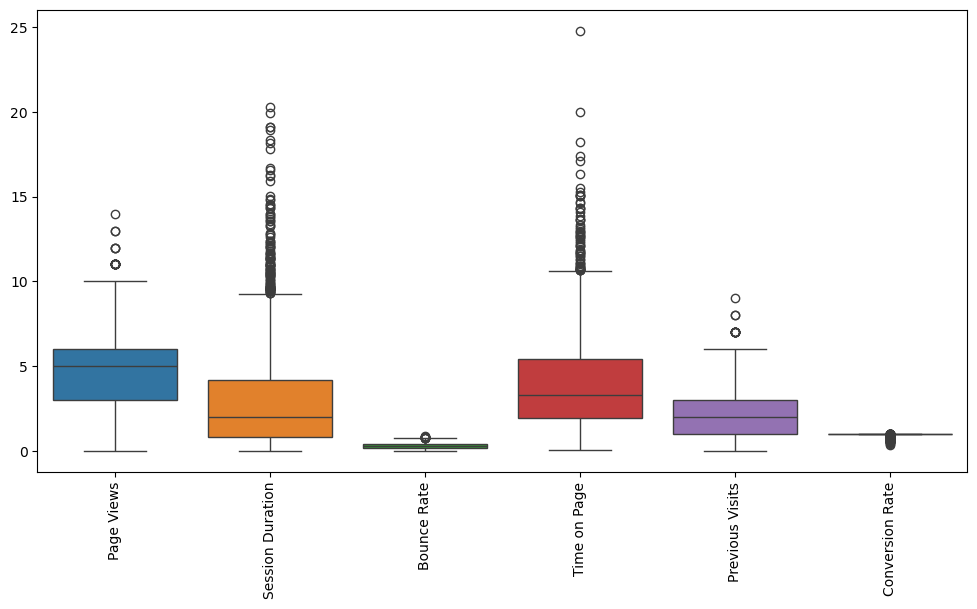

In [6]:
plt.figure(figsize=(12,6))
sns.boxplot(data=traffic)
plt.xticks(rotation=90)
plt.show()

# Encode the categorical variable "Traffic Source" into numerical values using techniques like one-hot encoding.

In [8]:
encoded=pd.get_dummies(traffic,columns=['Traffic Source'],drop_first=True)
encoded.head()

,Page Views,Session Duration,Bounce Rate,Time on Page,Previous Visits,Conversion Rate,Traffic Source_Organic,Traffic Source_Paid,Traffic Source_Referral,Traffic Source_Social
0,5,11.051381,0.230652,3.890460,3,1.0,True,False,False,False
1,4,3.429316,0.391001,8.478174,0,1.0,False,False,False,True
2,4,1.621052,0.397986,9.636170,2,1.0,True,False,False,False
3,5,3.629279,0.180458,2.071925,3,1.0,True,False,False,False
4,5,4.235843,0.291541,1.960654,5,1.0,False,True,False,False


# Conduct EDA to understand the distribution of variables and their relationships with the target variable Conversion Rate.

In [10]:
encoded.describe()

,Page Views,Session Duration,Bounce Rate,Time on Page,Previous Visits,Conversion Rate
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,4.950500,3.022045,0.284767,4.027439,1.978500,0.982065
std,2.183903,3.104518,0.159781,2.887422,1.432852,0.065680
min,0.000000,0.003613,0.007868,0.068515,0.000000,0.343665
25%,3.000000,0.815828,0.161986,1.935037,1.000000,1.000000
50%,5.000000,1.993983,0.266375,3.315316,2.000000,1.000000
75%,6.000000,4.197569,0.388551,5.414627,3.000000,1.000000
max,14.000000,20.290516,0.844939,24.796182,9.000000,1.000000


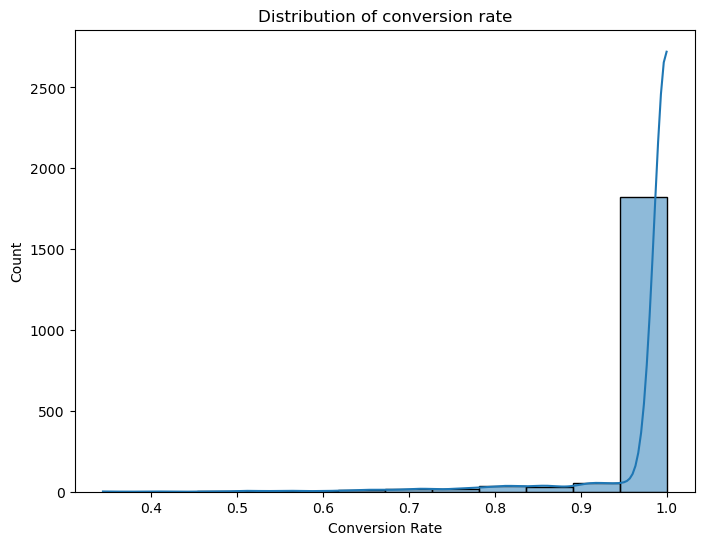

In [11]:
# Histogram of the target variable 
plt.figure(figsize=(8,6))
sns.histplot(encoded['Conversion Rate'],kde=True)
plt.title("Distribution of conversion rate")
plt.show()

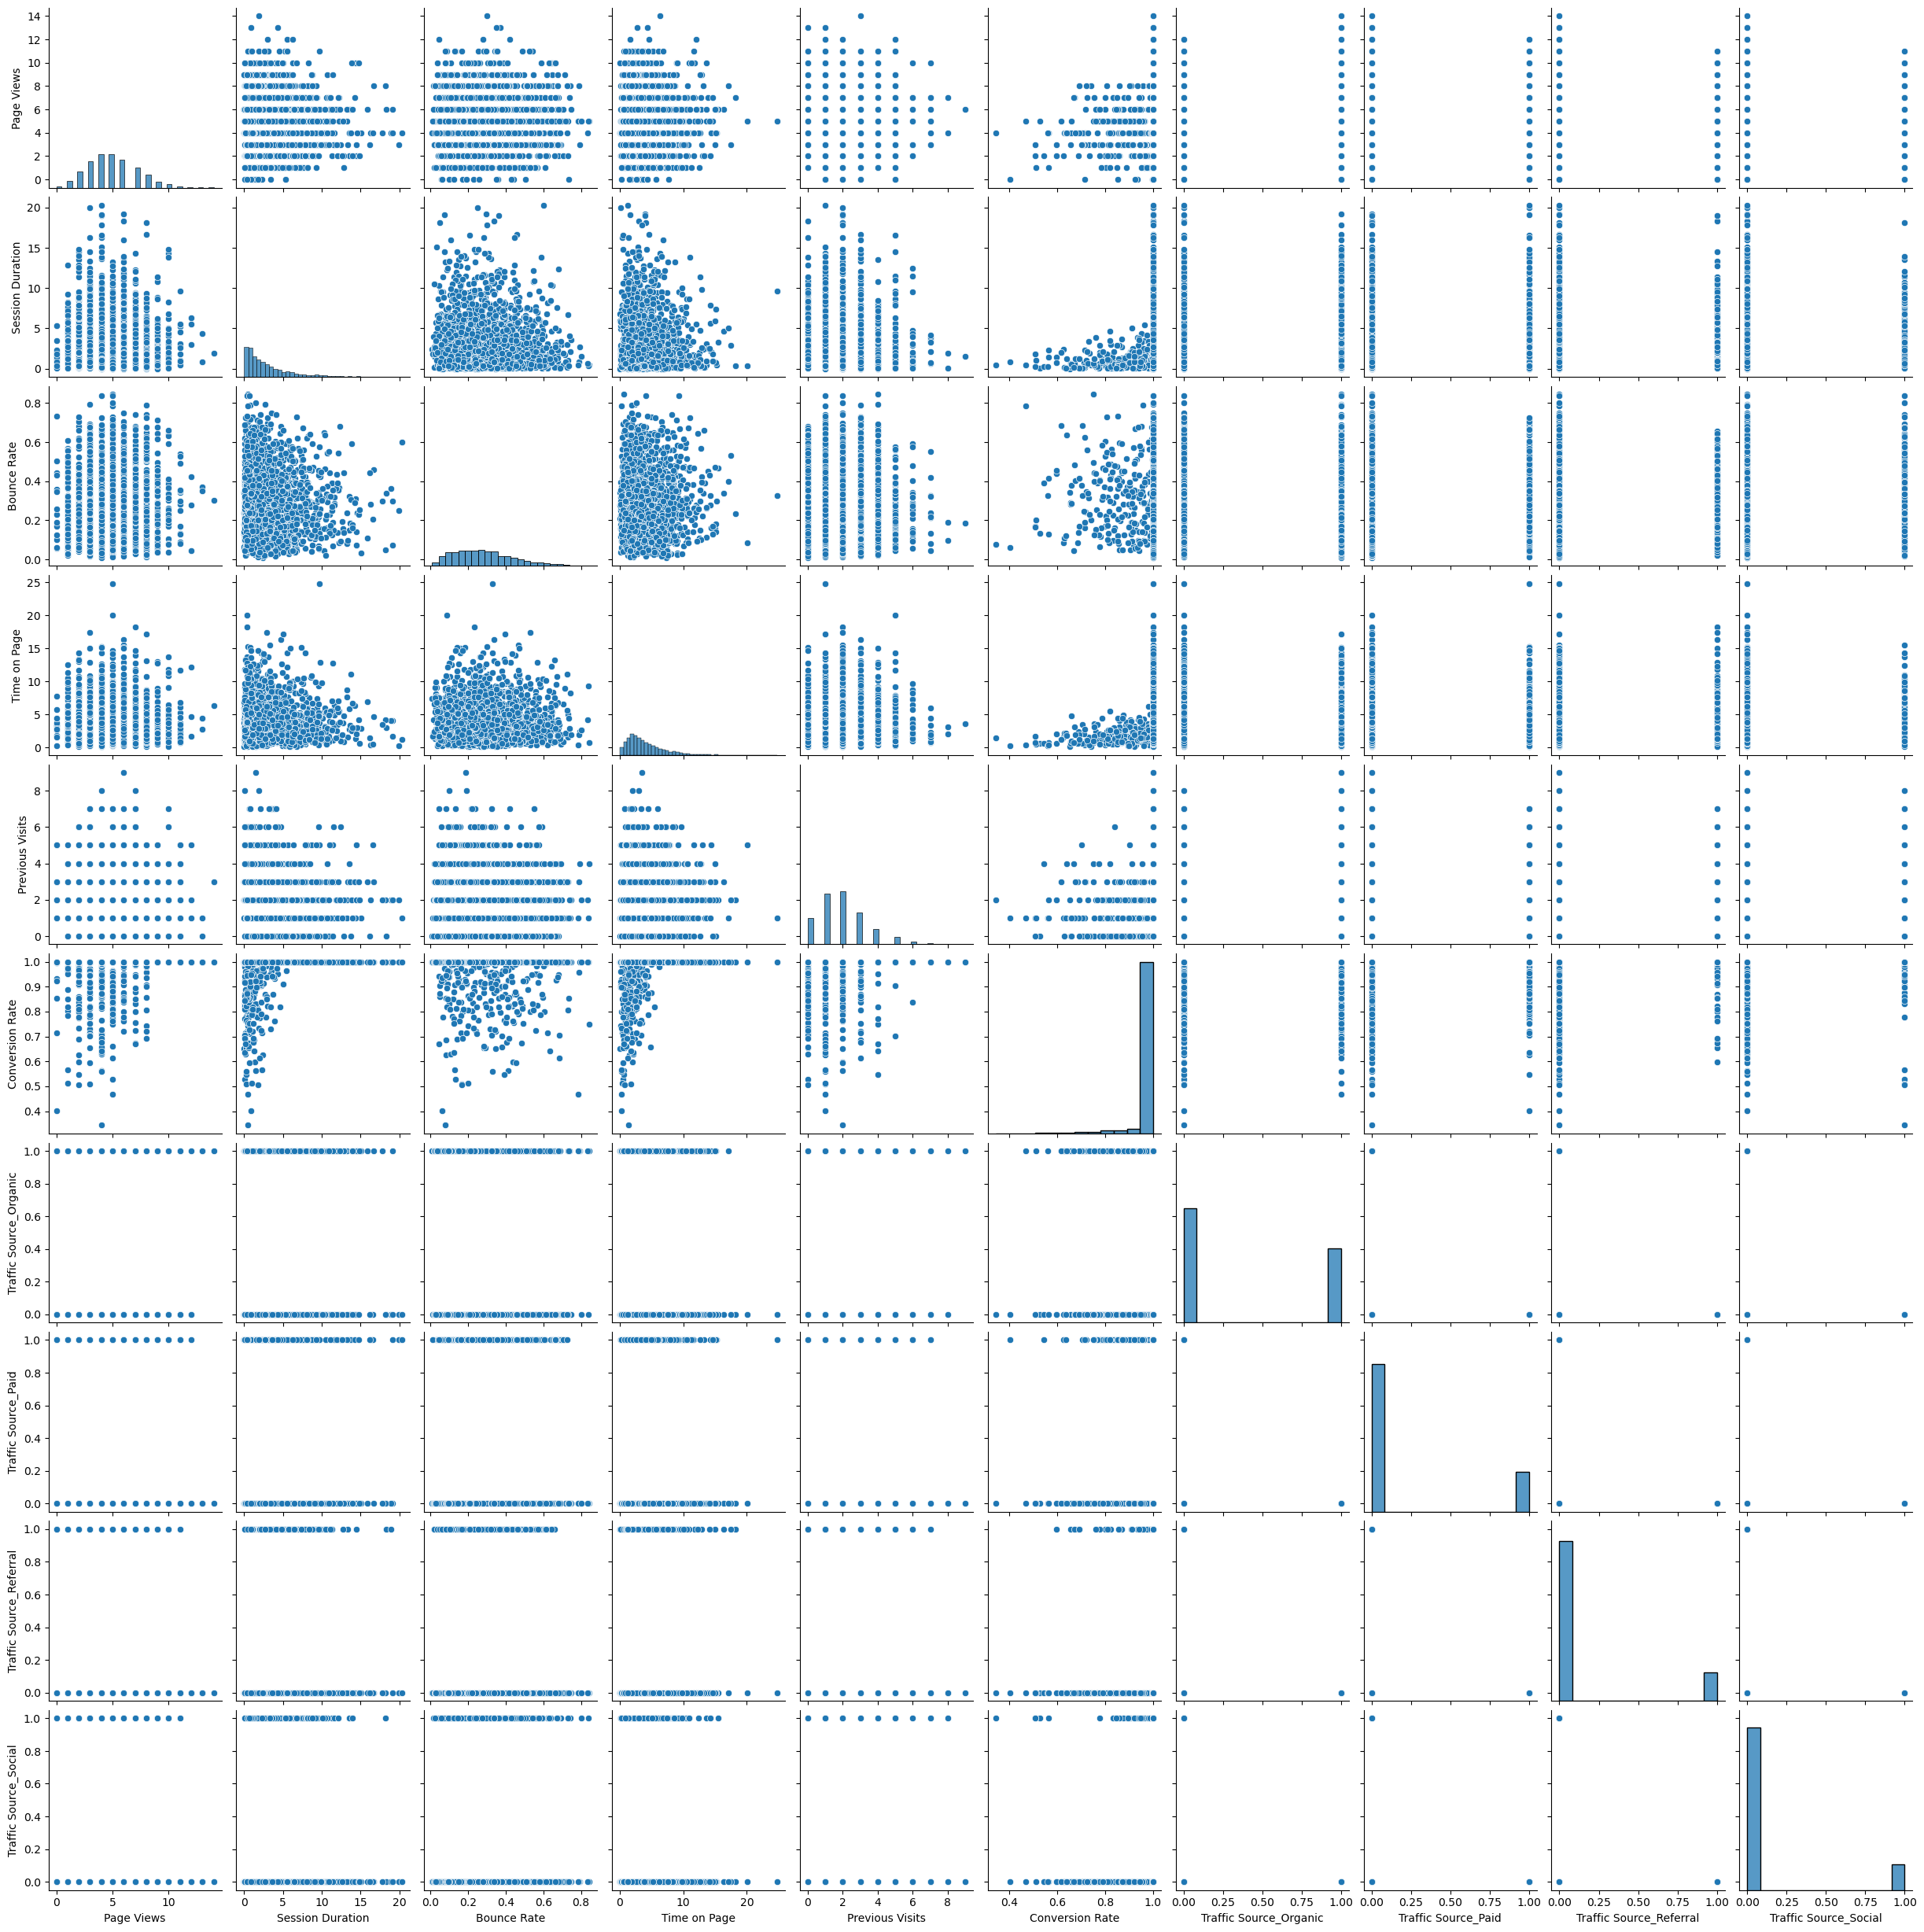

In [12]:
sns.pairplot(encoded)
plt.show()

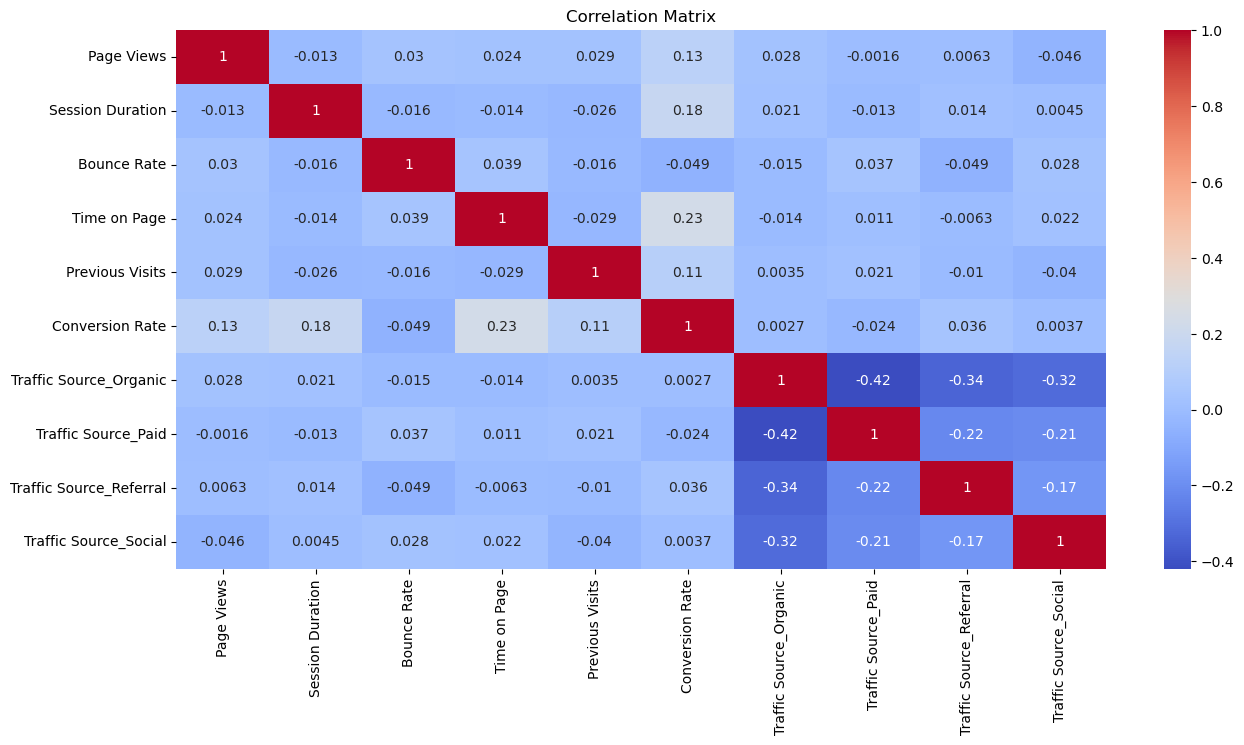

In [41]:
plt.figure(figsize=(15,7))
correlation_matrix=encoded.corr()
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Discuss which variables appear to be the strongest predictors of Conversion Rate.


# Multiple Linear Regression:


# Split the data into training (80%) and testing (20%) sets.

In [49]:
X=encoded.drop('Conversion Rate',axis=1)
Y=encoded['Conversion Rate']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=44)

# Implement a Multiple Linear Regression model to predict Conversion Rate based on the independent variables.

In [58]:
model=LinearRegression()

# Train the model on the training set.

In [62]:
model.fit(X_train,Y_train)

LinearRegression()

# Make predictions using the test set.

y_pred=model.predict(X_test)
encoded['prediction']=np.nan
encoded.loc[X_test.index,'prediction']=y_pred
encoded.head()


# Evaluate the model using the following metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R-squared (R²), 
# Adjusted R-squared (Adjusted R²)

In [89]:
mae=mean_absolute_error(Y_test,y_pred)
mse=mean_squared_error(Y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(Y_test,y_pred)
adjusted_r2=1-(1-r2)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}") 
print(f"Root Mean Squared Error (RMSE): {rmse}") 
print(f"R-squared (R²): {r2}") 
print(f"Adjusted R-squared (Adjusted R²): {adjusted_r2}")

Mean Absolute Error (MAE): 0.03494689550969936
Mean Squared Error (MSE): 0.00410446114517196
Root Mean Squared Error (RMSE): 0.06406606859463096
R-squared (R²): 0.11906539193117471
Adjusted R-squared (Adjusted R²): 0.09873613174497109


# Interpret these metrics to explain how well your model is performing.

# Polynomial Regression


# Transform the features to include polynomial terms (e.g., degree 2 or 3).


In [96]:
poly=PolynomialFeatures(degree=3)
X_poly_train=poly.fit_transform(X_train)
X_poly_test=poly.transform(X_test)

# Implement a Polynomial Regression model using the transformed features.

In [101]:
poly_model=LinearRegression()
poly_model.fit(X_poly_train,Y_train)

LinearRegression()

# Make predictions using the test set.


In [108]:
y_poly_pred=poly_model.predict(X_poly_test)

y_poly_pred_df = pd.DataFrame(y_poly_pred, columns=['Prediction 1'])

# Display the first few rows of y_poly_pred_df
y_poly_pred_df.head()


,Prediction 1
0,1.005842
1,0.928627
2,0.904960
3,1.015655
4,0.995025


# Evaluate the model using the following metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), 
# R-squared (R²), Adjusted R-squared (Adjusted R²).


In [113]:
# Calculate evaluation metrics for the Polynomial Regression model
mae_poly = mean_absolute_error(Y_test, y_poly_pred)
mse_poly = mean_squared_error(Y_test, y_poly_pred)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(Y_test, y_poly_pred)
adjusted_r2_poly = 1 - (1-r2_poly)*(len(Y_test)-1)/(len(Y_test)-X_poly_test.shape[1]-1)

# Print the evaluation metrics for the Polynomial Regression model
print(f"Polynomial Regression - Mean Absolute Error (MAE): {mae_poly}")
print(f"Polynomial Regression - Mean Squared Error (MSE): {mse_poly}")
print(f"Polynomial Regression - Root Mean Squared Error (RMSE): {rmse_poly}")
print(f"Polynomial Regression - R-squared (R²): {r2_poly}")
print(f"Polynomial Regression - Adjusted R-squared (Adjusted R²): {adjusted_r2_poly}")


Polynomial Regression - Mean Absolute Error (MAE): 0.031073128285324766
Polynomial Regression - Mean Squared Error (MSE): 0.0034156492800768924
Polynomial Regression - Root Mean Squared Error (RMSE): 0.05844355636061937
Polynomial Regression - R-squared (R²): 0.2669040944913027
Polynomial Regression - Adjusted R-squared (Adjusted R²): -0.6341076329495541


# Compare the performance of the polynomial regression model with the multiple linear regression model.


# Insights and Reporting


# Plot the actual vs predicted values for both the multiple linear regression and polynomial regression models.


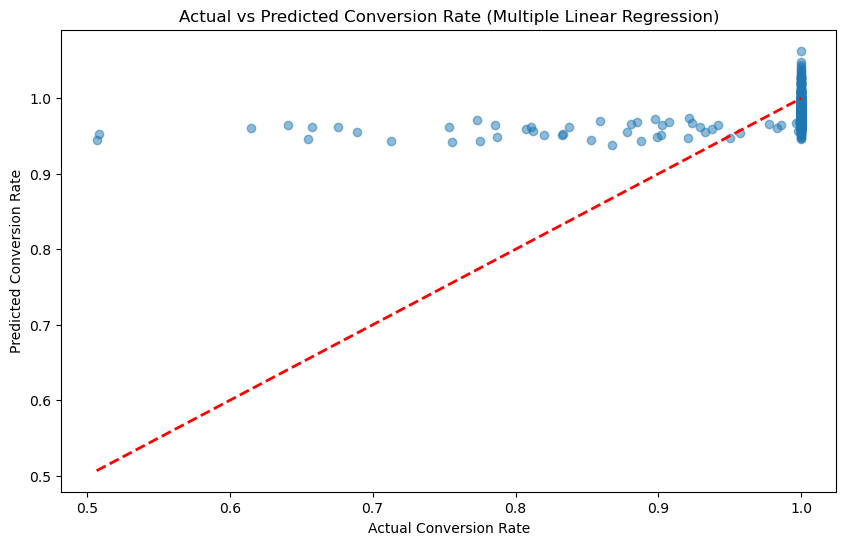

In [118]:
# Multiple linear regression
# Plot the actual vs predicted values for Multiple Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Conversion Rate')
plt.ylabel('Predicted Conversion Rate')
plt.title('Actual vs Predicted Conversion Rate (Multiple Linear Regression)')
plt.show()



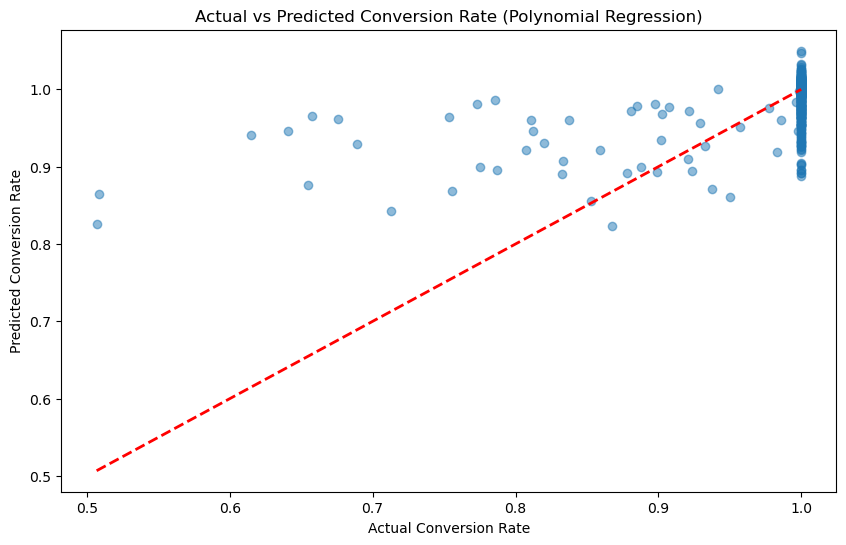

In [122]:
# Polynomial regression
# Plot the actual vs predicted values for Polynomial Regression
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_poly_pred, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Conversion Rate')
plt.ylabel('Predicted Conversion Rate')
plt.title('Actual vs Predicted Conversion Rate (Polynomial Regression)')
plt.show()


# Visualize the residuals (errors) to check for patterns that might indicate model issues.


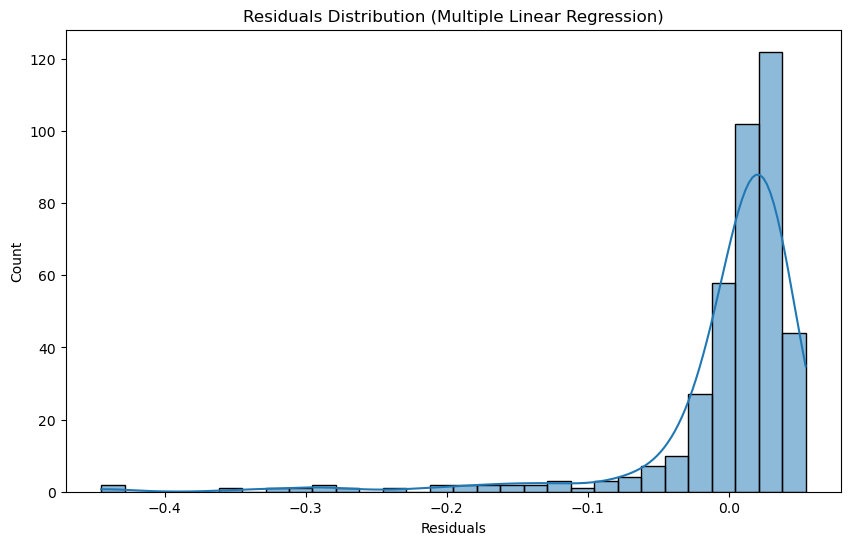

In [125]:
# Calculate residuals for Multiple Linear Regression
residuals = Y_test - y_pred

# Plot the residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel('Residuals')
plt.title('Residuals Distribution (Multiple Linear Regression)')
plt.show()


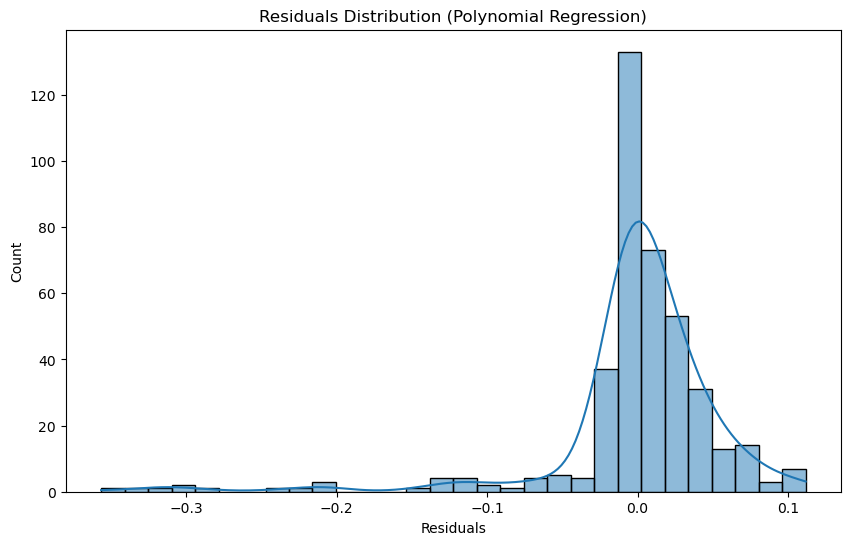

In [127]:
# Calculate residuals for Polynomial Regression
residuals_poly = Y_test - y_poly_pred

# Plot the residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals_poly, kde=True, bins=30)
plt.xlabel('Residuals')
plt.title('Residuals Distribution (Polynomial Regression)')
plt.show()


# If polynomial regression shows better performance, plot the polynomial curve against the data points.


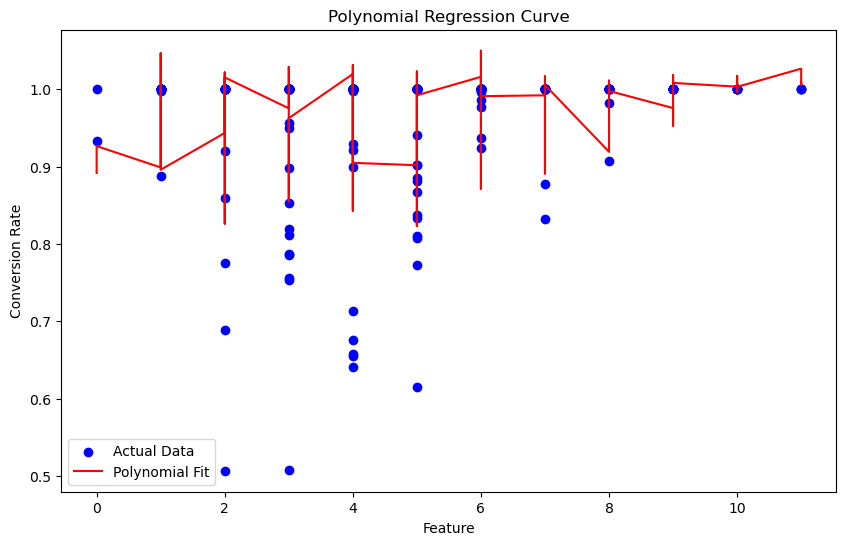

In [130]:
# Plotting the Polynomial Regression Curve
plt.figure(figsize=(10, 6))
plt.scatter(X_test.iloc[:, 0], Y_test, color='blue', label='Actual Data')
sorted_indices = np.argsort(X_test.iloc[:, 0])
plt.plot(X_test.iloc[sorted_indices, 0], y_poly_pred[sorted_indices], color='red', label='Polynomial Fit')
plt.xlabel('Feature')
plt.ylabel('Conversion Rate')
plt.title('Polynomial Regression Curve')
plt.legend()
plt.show()


# Conclusion